# Life Expectancy and Income in Australia

## Question

This small study aims to answer the question: *Is there are link between family income and life-expectancy in Australia?*

It is natural to assume than an individual’s income is linked to their life expectancy. Wealthy individuals can afford better healthcare and/or private health insurance. In 1984, however, the Hawke government introduced Medicare. This scheme gives Australians residents access to universal, publicly funded healthcare that either completely covers or heavily subsidises essential health treatments and consultations. Medicare was introduced based on the belief that good health in a universal right and should not depend an individual’s wealth. This study seeks to determining how well Medicare has gone about in achieving this outcome by determining if there still exists a correlation between the family income and life expectancy of Australian residents.

## Datasets

#### LGA15 Median Age at Death Categorised by Sex - 2010-2014

This dataset lists the median age-at-death (AAD) for all deaths occurring between 2010 and 2014 categorised by the Local Government Area (LGA).

*Source: Torrens University Australia - Public Health Information Development Unit*

#### LGA11-based B02 Selected Medians and Averages as at 2011-08-11

Contains summary data (medians and means) from the 2011 Australian Census.

*Source: The Australian Bureau of Statistics based on data from the 2011 Census*

## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data into DataFrame
lga_averages = pd.read_csv('LGA11_averages_2011.csv',encoding = 'ISO-8859-1')
lga_AAD = pd.read_csv('LGA15_median_AAD_2011_2014.csv',encoding = 'ISO-8859-1')
lga_fam_count = pd.read_csv('LGA_family_count.csv',encoding = 'ISO-8859-1')

In [3]:
# Create new column for median family income per family memeber
lga_averages['med_income_pfm'] = lga_averages['tot_fam_inc_weekly'] / lga_averages['mean_household_size']

## Integration

In [4]:
# Merge the datasets by LGA using an inner join
integrated = pd.merge(lga_averages, lga_AAD, on='lga_code', how='inner')
integrated = pd.merge(integrated, lga_fam_count, on='lga_code', how='inner')

In [5]:
# Drop duplicate column
integrated = integrated.drop(columns=['lga_name_y'])

In [6]:
# Create another DataFrame with no rows from the ACT
no_act = integrated[integrated.ste_name != 'act']

## Analysis

### Correlation

The scatter plot below shows Median Total Family Income versus Median Age At Death (with the bubble size representing the LGAs total family count).

It reveals a possible correlation between these two variables. As the median total family income increases the median AAD appears as if it tends upwards as well.

Text(0,0.5,'Median Age At Death')

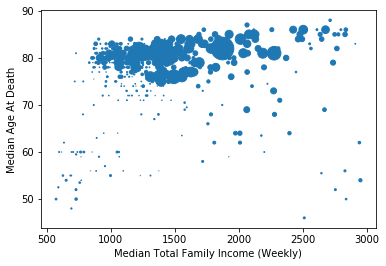

In [7]:
# Plotting Median Family Income versus Median Age At Death with weighting by population
plt = integrated.plot(kind='scatter', x='tot_fam_inc_weekly', y='dth_p_med_age', s=integrated['tot_famalies']/200)
plt.set_xlabel('Median Total Family Income (Weekly)')
plt.set_ylabel('Median Age At Death')

If a correlation does exist however the errors are very high. We should still keep in mind that low Pearson's correlation coefficient does not necessarily mean that a correlation does not exist.

In [8]:
integrated['tot_fam_inc_weekly'].corr(integrated['dth_p_med_age'])

0.13197392104724212

### Confounding Variable

The outliers in the bottom left of the above plot call into question an important confounding variable. Perhaps there is a correlation between an LGA’s population and its median AAD? A larger population would suggest that LGA is closer to a major city and therefore has easier access to medical facilities. Living close to a major city might also be correlated with higher paying jobs.

If an LGA’s total population is correlated with both its median AAD and its median family income that would mean that the correlation between median AAD and median family income observed above is at least partially explained by population rather than being an entirely causal relationship.

Text(0,0.5,'Median Age At Death')

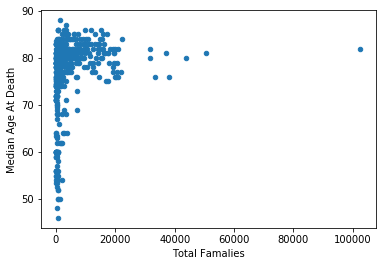

In [9]:
# Plotting Total Famalies versus Median Age At Death
plt = integrated.plot(kind='scatter', x='tot_famalies', y='dth_p_med_age')
plt.set_xlabel('Total Famalies')
plt.set_ylabel('Median Age At Death')

Text(0,0.5,'Median Total Family Income (Weekly)')

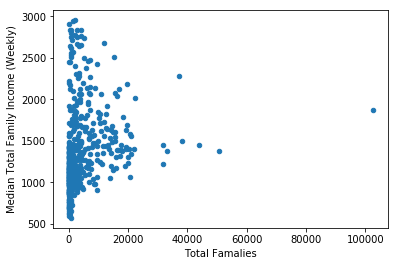

In [10]:
# Plotting Total Famalies versus Median Age At Death
plt = integrated.plot(kind='scatter', x='tot_famalies', y='tot_fam_inc_weekly')
plt.set_xlabel('Total Famalies')
plt.set_ylabel('Median Total Family Income (Weekly)')

Further exploration of the LGA populations reveals that while there is possibly a correlation between total families and median AAD there appears to be no correlation at all between total families and median family income. I.e. LGA population is perhaps a predictor of life-expectancy but not of family income. This rules out population as a confounding variable in explaining the link between median family income and median AAD.

### Correlation by State

Below is a more detailed version of the first scatter plot. The colours represent the different states and the length of the regression line shows the income range for that state.

There are several very interesting trends that cause us to call into question the link between family income and life-expectancy.

Firstly, the regression line for the state of South Australia (purple) trends slightly downwards. This completely contradicts our hypothesis that as family income increases so does life-expectancy.

Secondly the life-expectancy of families living in the Northern Territory is substantially lower than that of families living in the other states. This is despite the fact the income range of NT families is not significantly different from the income range of QLD families. This suggests that geography has a much larger impact on life-expectancy than income.

*Note: The ACT has been dropped from these plots as it only contains one LGA and therefore does not have enough data to observe trends.*

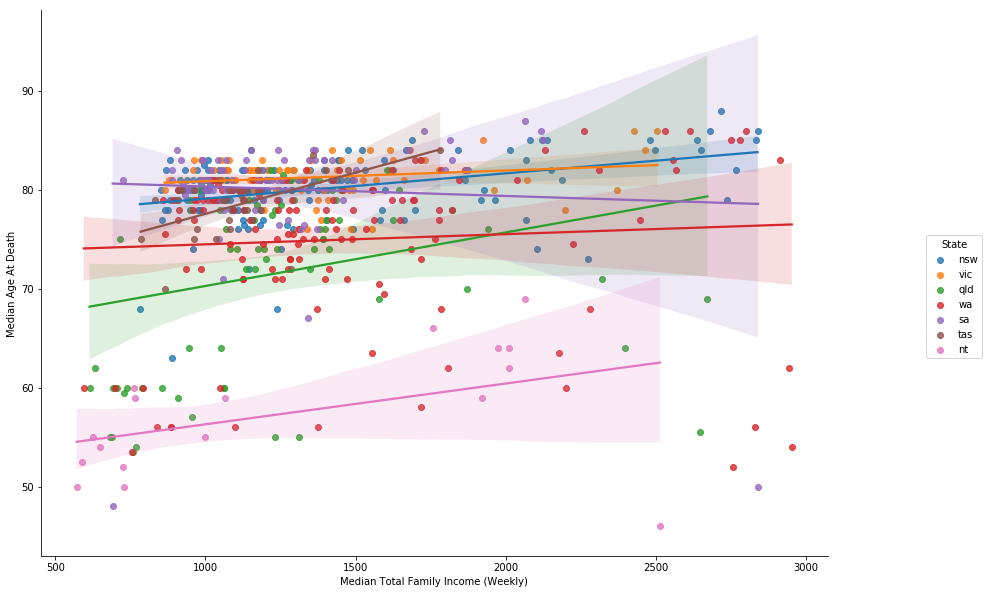

In [11]:
# Plotting Median Family Income versus Median Age At Death with regression line
plt = sns.lmplot(x='tot_fam_inc_weekly', y='dth_p_med_age', data=no_act, hue="ste_name", fit_reg=True, truncate=True)
plt._legend.set_title('State')
plt.set(xlabel='Median Total Family Income (Weekly)', ylabel='Median Age At Death')
plt.fig.set_size_inches(15,9)

The boxplots below support the above observation that while the income distribution of NT residents isn't substancially lower than that of the other states, their life-expectancy is.

[Text(0,0.5,'State'), Text(0.5,0,'Median Age At Death')]

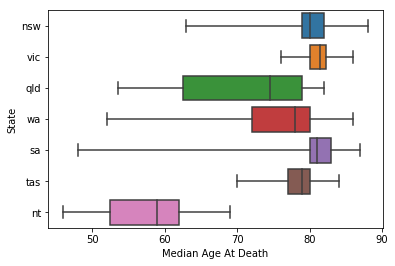

In [12]:
# Boxplot of Median AAD by State
plt = sns.boxplot(x="dth_p_med_age", y="ste_name", data=no_act, whis=np.inf)
plt.set(xlabel='Median Age At Death', ylabel='State')

[Text(0,0.5,'State'), Text(0.5,0,'Median Total Family Income (Weekly)')]

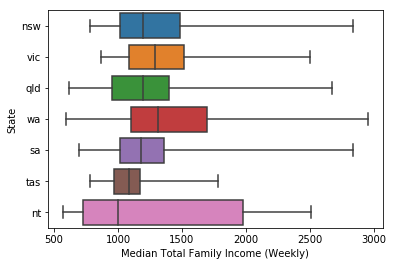

In [13]:
# Boxplot of Median Family Income by State
plt = sns.boxplot(x="tot_fam_inc_weekly", y="ste_name", data=no_act, whis=np.inf)
plt.set(xlabel='Median Total Family Income (Weekly)', ylabel='State')

## Question Resolution

Our observations lead us to conclude that there is likely no significant link between family income and life-expectancy in present day Australia. I.e. as income increases there is no clear-cut increase in life-expectancy. The life-expectancy of NT families is also much lower than other states despite its income range being similar suggesting that geography is much better predictor of life-expectancy than family income.

Australia's guaranteed universal healthcare through Medicare and its high minimum-wage appear to have accompolished the task of granting Australian residents long life and good health regardless of their financial positions.